importing Jupyter notebook from /workspaces/codespaces-jupyter/notebooks/w4/general_linear_fitting.ipynb
A0: 0.5683350482726 
A1: 4.906523335086163


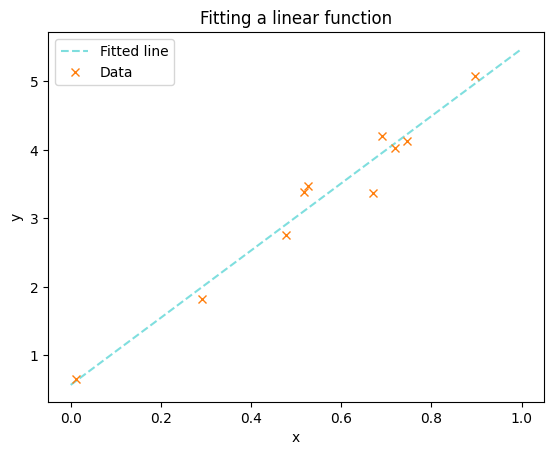

In [3]:
import import_ipynb
import main
import csv
from w5 import lagrange_interp as interp5
from w8 import polynomial_curve_fit as poly8
from w4 import general_linear_fitting as lerp4
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)

### Question 1

a0: 3.023163654676887 
a1: 2.0145773128688695 
a2 -5.008639614058129 
a3 -0.9995942371604961


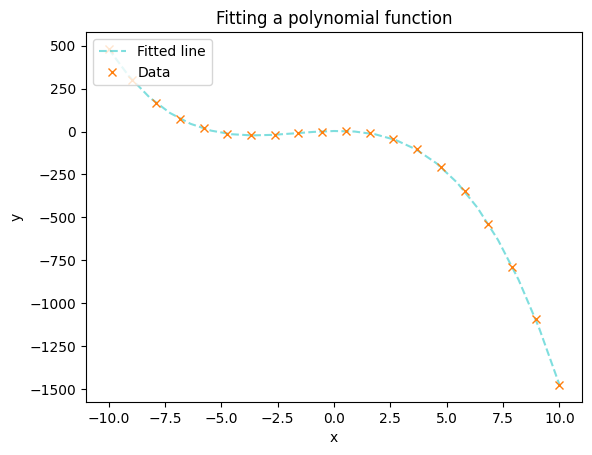

In [4]:
file = "test-2_q1.csv" #define the filename
values = poly8.opencsv(file) #imports data into values([x],[y])
a = poly8.gaussjord_elim(poly8.augment(values,3),4)
X1, X2 = values[:,0], np.linspace(-10,10,23)
Y1, Y2 = values[:,1], (a[0] + a[1]*X2 + a[2]*X2**2 + a[3]*X2**3)
fig, ax = plt.subplots()
ax.plot(X2, Y2, color="c", alpha=0.5, linestyle='--', label='Fitted line')
ax.plot(X1, Y1, color="C1", marker='x', linestyle='none', label='Data')
ax.set_title('Fitting a polynomial function')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc="upper left")
print('a0:', a[0], '\na1:', a[1],
      '\na2', a[2], '\na3', a[3])

### Question 2

In [5]:
file = "test-2_q2.csv" #define the filename
values = poly8.opencsv(file) #imports data into values([x],[y])
#use lagrange interpolation from week 5:
interp5.lagrangePoly(1.8223416145230278, values[:,0],values[:,1])
#{determine at point x, list of x-values, list of y-values}

1.8223416145230273

### Question 3

In [20]:
file = "test-2_q3.csv" #define the filename
values = poly8.opencsv(file) #imports data into values([x],[y],[T])

for i in range(1,values.shape[0]-1): #for each row
    _t = np.array(values[i]) #store current row in cache
    j = i-1 #position of previous row
    while(j >= 0 and values[j,0]>_t[0]):
        #while previous row x-value is bigger than current row x-value
        values[j+1] = values[j] #replace 
        values[i+1] = _t
        j -= 1
    values[j+1] = _t

x = np.zeros(values.shape[0])
for i in range(0,values.shape[0]):
    x[i] = values[i,0]

y = np.zeros(values.shape[0])
for i in range(0,values.shape[0]):
    y[i] = values[i,1]    

q = np.zeros(values.shape[0])
for i in range(0,values.shape[0]):
    q[i] = values[i,2]

values

array([[ 6.,  6.,  7.],
       [ 6., 10.,  7.],
       [12.,  6.,  5.],
       [ 6., 10.,  7.]])

In [7]:
#interpolate in x-direction for Q11 and Q21
point = [7.6,6.4]

In [8]:
fy1 = lerp4.lerp([x[0],x[1]],[q[0],q[1]])[0]+point[0]*lerp4.lerp([x[0],x[1]],[q[0],q[1]])[1]
fy1

<string>:3: RuntimeWarning: invalid value encountered in scalar divide


nan

In [9]:
fy2 = lerp4.lerp([x[0],x[1]],[q[2],q[3]])[0]+point[0]*lerp4.lerp([x[0],x[1]],[q[2],q[3]])[1]
fy2

nan

In [10]:
fxy = lerp4.lerp([y[0],y[1]],[fy1,fy2])[0]+point[1]*lerp4.lerp([y[0],y[1]],[fy1,fy2])[1]
fxy

nan